In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
import warnings
warnings.filterwarnings('always')

In [2]:
df=pd.read_csv(r"D.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.shape

(303, 14)

In [5]:
X= df.drop(columns='class')
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [6]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,0
1,2
2,1
3,0
4,0


In [7]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [8]:
print(train_X.shape)# Features for training  
print(test_X.shape) # to find accuracy 
print(train_Y.shape) 
print(test_Y.shape)

(212, 13)
(91, 13)
(212, 1)
(91, 1)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [28]:
#1.Logistic Regression
logreg=LogisticRegression(random_state=0,
                         n_jobs=-1,
                          class_weight=None,
                          penalty = 'l2',
                        verbose=2,                          
                         max_iter=100)
model_1=logreg.fit(train_X,train_Y)
logreg_predict= model_1.predict(test_X)
accuracy_score(logreg_predict,test_Y)

C:\Users\pavit\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


0.5714285714285714

In [11]:
#2.Decision tree
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=25, min_samples_leaf=5)
DT_Model.fit(train_X, train_Y)
DT_Predict = DT_Model.predict(test_X)
DT_Accuracy = accuracy_score(test_Y, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.5934065934065934


C:\Users\pavit\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pavit\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pavit\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pavit\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pavit\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [12]:
#3. Neural Net
import tensorflow as tf

C:\Users\pavit\anaconda3\lib\site-packages\tensorflow\python\data\ops\iterator_ops.py:546: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class IteratorBase(collections.Iterator, trackable.Trackable,
C:\Users\pavit\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:106: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class DatasetV2(collections.Iterable, tracking_base.Trackable,


In [13]:
ann = tf.keras.models.Sequential()

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = ann.fit(train_X, train_Y, batch_size = 30, epochs = 100, verbose = 1, validation_data=(test_X, test_Y))

Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 1.1134e-07 - accuracy: 0.3774 - val_loss: 1.1266e-07 - val_accuracy: 0.3736
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1134e-07 - accuracy: 0.3774 - val_loss: 1.1266e-07 - val_accuracy: 0.3736
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1134e-07 - accuracy: 0.3774 - val_loss: 1.1266e-07 - val_accuracy: 0.3736
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1134e-07 - accuracy: 0.3774 - val_loss: 1.1266e-07 - val_accuracy: 0.3736
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1134e-07 - accuracy: 0.3774 - val_loss: 1.1266e-07 - val_accuracy: 0.3736
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1134e-07 - accuracy: 0.3774 - val_loss: 1.1266e-07 - val_accuracy: 0.3736
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1134e-07 - accuracy: 0.3774 - val_loss: 1.12

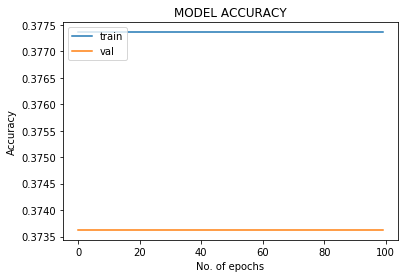

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
#4.Adaboost
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
model_7=abc.fit(train_X,train_Y)
abc_predict=model_7.predict(test_X)
accuracy_score(abc_predict,test_Y)

C:\Users\pavit\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5604395604395604

In [20]:
from sklearn.ensemble import RandomForestClassifier
#5.RandomForest 
rfc=RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 42)
model_4=rfc.fit(train_X,train_Y)
rfc_predict=model_4.predict(test_X)
accuracy_score(rfc_predict,test_Y)

C:\Users\pavit\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pavit\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.5934065934065934

In [21]:
#6.SVC
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'poly', C = 1, probability = True).fit(train_X, train_Y) 
svm_predictions = svm_model_linear.predict(test_X) 
# creating a confusion matrix  and finding accuracy 
acc=accuracy_score(test_Y, svm_predictions)
print('Test case accuracy is :'+ format(acc))
print('\n')

Test case accuracy is :0.5494505494505495




C:\Users\pavit\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
#7.KNN
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=5)
model_3= knn.fit(train_X,train_Y)
knn_predict=model_3.predict(test_X)
accuracy_score(knn_predict,test_Y)

C:\Users\pavit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6153846153846154

In [49]:
#8. LINEAR REG
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(n_jobs=-1,            
                         )
lin_reg.fit(train_X, train_Y)
lin_reg.score(test_X, test_Y)

0.6131309285247132

In [50]:
# PREDICTION ON GIVEN INPUT USING RANDOM FOREST AS IT HAS THE HIGHEST ACCURACY
index=input("Age")
ip=input("Sex")
long=input("Cp")
short=input("Trest")
symbol=input("Chol")
redirect=input("FBS")
fix=input("T")
sub=input("R")
http=input("t")
rl=input("E")
fav=input("0")
port=input("S")
hturl=input("C")
inp=[[int(index),int(ip),int(long),int(short),int(symbol),int(redirect),int(fix),int(sub),int(http),int(rl),int(fav),int(port),int(hturl)]]
a=knn.predict(inp)
print("Heart risk",a[0])

Age1
Sex11
Cp11
Trest1
Chol1
FBS1
T1
R1
t1
E1
01
S1
C1
Heart risk 2
